# Homework_05_NN
## 题目1&2&3&4&5&6：构建面向对象的多分类两层NN
本题搭建了一个2层的神经网络，其中包含1个隐层和1个输出层  
为了方便起见，我打算直接把第(1)(2)(3)(4)(5)(6)小问一起做，直接面向对象封装成类，然后直接做成对各种数据集都适用的NN，再用Softmax看看每一种概率，最后再用Sklearn的第三方库对比我们的结果。  
预测结果的可视化直接用预测结果与原数据分类对比

**<big>这次写的模型，可以自动读取所需要的输入层、输出层维度，所以对于不同类型的数据集，可以直接使用，不用修改任何程序参数。另外，模型的所有参数都开放可修改，对于学习速率、训练次数、隐层的维度等都可以自定义。<big>**
### (1)导入第三方库

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
import time

### (2)加载原数据
此处先用二分类的数据集，后续再使用多分类数据集如'dataset_digits'

In [2]:
np.random.seed(0)
x,y=datasets.make_moons(200, noise=0.20) #生成月亮图形状数据,其中x代表数据坐标,y代表数据分类
#plt.scatter(x[:, 0],x[:, 1],c=y,cmap=plt.cm.Spectral)
#plt.title('Origin data')
#plt.show()

### (3)创建Sigmoid函数

In [3]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

### (4)创建NN的类
**因为此处封装成类，所以是一大代码堆在一起，为了方便理解和看懂，我基本上在每个语句后面都添加了注释**

In [4]:
class NN:
    def __init__(self,datasets,type): #datasets表示训练样本数据集，type代表训练样本分类
        self.alpha=0.01 #学习速率
        self.times=1000 #计算次数
        self.input_num=2 #输入层维度
        self.hide_num=2 #隐层维度数
        self.output_num=2 #输出层维度
        self.datasets=datasets #训练或预测数据集
        self.type=type #数据集内数据对应类别

    #传入模型参数(设置此函数的目的，是为了应对不同数据时，使模型的参数可变)
    def change_Parameters(self,input_num,hide_num,output_num,alpha,times):
        self.input_num=input_num
        self.hide_num=hide_num
        self.output_num=output_num
        self.alpha=alpha
        self.times=times

    #随机初始化权重w与偏移b
    def init_wb(self):
        self.w1,self.b1,self.w2,self.b2=[],[],[],[]  #创建w,b矩阵
        n1,n2=np.sqrt(self.input_num),np.sqrt(self.hide_num) #创建参数n1,n2便于后续计算
        self.w1=np.random.randn(self.input_num,self.hide_num)/n1  #根据输入维度,隐层维度输出生成w1,b1矩阵
        self.b1=np.zeros((1,self.hide_num)) #生成b1为(1,隐层维度)的矩阵，其中矩阵内的数值随机生成
        self.w2=np.random.randn(self.hide_num, self.output_num)/n2  #根据输入维度,隐层维度输出生成w2,b2矩阵
        self.b2=np.zeros((1,self.output_num))  #生成b2为(1,输出层维度)的矩阵，其中矩阵内的数值随机生成
        #将原始数据类型储存
        self.true_type=np.zeros((self.datasets.shape[0],self.output_num))  #初始化数据类别矩阵
        for i in range(self.output_num):
            self.true_type[np.where(self.type==i),i]=1 #将数据类别矩阵进行填充，用原始数据的类别

    #定义向前计算函数
    def forward_calculate(self):
        self.z1=sigmoid(self.datasets.dot(self.w1)+self.b1)  #对应数学表达式：z1=sigmoid(X*w1+b1)，为隐层的输出
        self.z2=sigmoid(self.z1.dot(self.w2)+self.b2)  #对应数学表达式：z2=sigmoid(X*w2+b2)，为输出层输出

    #定义反向计算传播函数
    def back_calculate(self):
        for i in range(self.times): #一共反向计算的次数
            self.forward_calculate() #进行向前运算
            predict_result=np.argmax(self.z2,axis=1) #寻找最大项来作为预测值
            self.accuracy=accuracy_score(self.type,predict_result) #调用sklearn计算准确度
            print(f'这是第{i+1}次训练,正确率为{self.accuracy*100}%')
            if self.accuracy==1:
                return
            #每一次正向计算后的结果和真实结果做比较，计算误差值；
            #然后将误差引入w和b，根据误差函数值改变w和b；
            #然后重复进行上述步骤，直到达到计算次数或没有误差。
            n2=self.z2*(1-self.z2)*(self.true_type-self.z2)
            n1=self.z1*(1-self.z1)*(np.dot(n2,self.w2.T))
            self.w2=self.w2+self.alpha*np.dot(self.z1.T,n2)
            self.b2=self.b2+self.alpha*np.sum(n2,axis=0)
            self.w1=self.w1+self.alpha*np.dot(self.datasets.T,n1)
            self.b1=self.b1+self.alpha*np.sum(n1,axis=0)

    def predict(self,predict_datasets,predict_datasets_type):
        self.datasets=predict_datasets
        self.forward_calculate()  # 利用训练好的w,b进行向前运算
        predict_result=np.argmax(self.z2, axis=1)
        self.predict_result=predict_result
        self.predict_datasets=predict_datasets
        self.predict_datasets_type=predict_datasets_type
        print(f'此次预测数据个数为{np.shape(predict_datasets)[0]}个,预计预测准确度为{self.accuracy*100}%')
        accuracy=0
        for i in range(np.shape(predict_datasets)[0]): #将预测数据集中的每个数据都进行预测
            if predict_datasets_type[i]==predict_result[i]:
                accuracy+=1
                print(f'这是对第{i+1}个数据的预测，真实类别为{predict_datasets_type[i]}，预测类别为{predict_result[i]}')
            else:
                print(f'这是对第{i+1}个数据的预测，真实类别为{predict_datasets_type[i]}，预测类别为{predict_result[i]}           错')
        print(f'此次预测个数为{np.shape(predict_datasets)[0]}个，正确率为{(accuracy/np.shape(predict_datasets)[0])*100}%')

    def Visulise(self):
        plt.scatter(self.predict_datasets[:, 0],self.predict_datasets[:, 1],c=self.predict_datasets_type,cmap=plt.cm.Spectral) #原数据分类
        plt.title('Origin type')
        plt.show()
        plt.scatter(self.predict_datasets[:, 0],self.predict_datasets[:, 1],c=self.predict_result,cmap=plt.cm.Spectral) #预测数据分类
        plt.title('Predict data')
        plt.show()

    def softmax(self):
        #print(self.z2)
        softmax_result=np.zeros((np.shape(self.predict_datasets)[0],self.output_num)) #初始化softmax分类概率矩阵，其中维度按照(个数，类别)进行生成
        softmax_num=np.sum(np.exp(self.z2), axis=1) #让所有分类的概率先相加
        for i in range(np.shape(self.z2)[0]):
            for j in range(np.shape(self.z2)[1]):
                softmax_result[i,j]=np.exp(self.z2[i,j])/softmax_num[i] #用定义，计算每一类的值占总值的比例
        for i in range(np.shape(self.predict_datasets)[0]):
            if self.predict_datasets_type[i]==self.predict_result[i]:
                print(f'这是第{i+1}个数据的Softmax分类结果：\n'
                      f'{softmax_result[i]}\n'
                      f'真实类别是{self.predict_datasets_type[i]},概率最大的为第{self.predict_result[i]+1}个，代表{self.predict_result[i]}\n')
            else:
                print(f'这是第{i + 1}个数据的Softmax分类结果：\n'
                      f'{softmax_result[i]}\n'
                      f'真实类别是{self.predict_datasets_type[i]},概率最大的为第{self.predict_result[i] + 1}个，代表{self.predict_result[i]}'
                      f'(错)\n')
    

### (5)创建训练模型实例

In [5]:
nn=NN(x,y) #创建NN实例，其中x代表要分类的数据，y代表每个数据对应的分类
#改变模型参数，设定学习速率为0.01,计算次数为1000次,隐层为100维,输入层输出层维度用np.shape()获得，这样可适用于不同的数据集
#可自定义每个参数，各个层数维度此处直接用np.shape()获取，所以此模型可以适用于不同的数据集
imput_num=(np.shape(x)[-1]) #获得输入层的维度，适用于不同的数据集
#获得输出层的维度，即获得数据一共有几类
output_num=0
ls=[]
for i in y:
    if i not in ls:
        output_num+=1
        ls.append(i)
nn.change_Parameters(alpha=0.2,times=1000,input_num=imput_num,hide_num=100,output_num=output_num) #隐层数量可以自定义,此处定义为100层
nn.init_wb()
nn.back_calculate()

这是第1次训练,正确率为50.0%
这是第2次训练,正确率为71.0%
这是第3次训练,正确率为65.5%
这是第4次训练,正确率为65.0%
这是第5次训练,正确率为61.5%
这是第6次训练,正确率为55.50000000000001%
这是第7次训练,正确率为74.0%
这是第8次训练,正确率为50.0%
这是第9次训练,正确率为74.5%
这是第10次训练,正确率为65.5%
这是第11次训练,正确率为64.0%
这是第12次训练,正确率为62.5%
这是第13次训练,正确率为60.5%
这是第14次训练,正确率为59.5%
这是第15次训练,正确率为60.0%
这是第16次训练,正确率为62.0%
这是第17次训练,正确率为63.5%
这是第18次训练,正确率为53.0%
这是第19次训练,正确率为71.0%
这是第20次训练,正确率为50.0%
这是第21次训练,正确率为83.0%
这是第22次训练,正确率为78.5%
这是第23次训练,正确率为83.5%
这是第24次训练,正确率为83.5%
这是第25次训练,正确率为83.5%
这是第26次训练,正确率为83.0%
这是第27次训练,正确率为84.0%
这是第28次训练,正确率为84.5%
这是第29次训练,正确率为84.5%
这是第30次训练,正确率为84.5%
这是第31次训练,正确率为85.5%
这是第32次训练,正确率为85.5%
这是第33次训练,正确率为85.0%
这是第34次训练,正确率为85.0%
这是第35次训练,正确率为85.5%
这是第36次训练,正确率为85.5%
这是第37次训练,正确率为85.0%
这是第38次训练,正确率为85.0%
这是第39次训练,正确率为85.0%
这是第40次训练,正确率为85.0%
这是第41次训练,正确率为85.0%
这是第42次训练,正确率为85.0%
这是第43次训练,正确率为85.0%
这是第44次训练,正确率为85.0%
这是第45次训练,正确率为85.0%
这是第46次训练,正确率为85.0%
这是第47次训练,正确率为85.0%
这是第48次训练,正确率为85.0%
这是第49次训练,正确率为85.5%
这是第50次训练,正确率为85.5%
这是第51次训练,正确率为86.0%
这是第52次训练,正确率为85.0%
这是第53次训练

这是第499次训练,正确率为97.5%
这是第500次训练,正确率为97.5%
这是第501次训练,正确率为97.5%
这是第502次训练,正确率为98.0%
这是第503次训练,正确率为97.5%
这是第504次训练,正确率为98.0%
这是第505次训练,正确率为97.5%
这是第506次训练,正确率为98.0%
这是第507次训练,正确率为97.5%
这是第508次训练,正确率为98.0%
这是第509次训练,正确率为97.5%
这是第510次训练,正确率为98.0%
这是第511次训练,正确率为97.5%
这是第512次训练,正确率为98.0%
这是第513次训练,正确率为97.5%
这是第514次训练,正确率为98.0%
这是第515次训练,正确率为97.5%
这是第516次训练,正确率为98.0%
这是第517次训练,正确率为97.5%
这是第518次训练,正确率为98.0%
这是第519次训练,正确率为97.5%
这是第520次训练,正确率为98.0%
这是第521次训练,正确率为97.5%
这是第522次训练,正确率为98.0%
这是第523次训练,正确率为97.5%
这是第524次训练,正确率为98.0%
这是第525次训练,正确率为97.5%
这是第526次训练,正确率为98.0%
这是第527次训练,正确率为97.5%
这是第528次训练,正确率为98.0%
这是第529次训练,正确率为97.5%
这是第530次训练,正确率为98.0%
这是第531次训练,正确率为97.5%
这是第532次训练,正确率为98.0%
这是第533次训练,正确率为97.5%
这是第534次训练,正确率为98.0%
这是第535次训练,正确率为97.5%
这是第536次训练,正确率为98.0%
这是第537次训练,正确率为97.5%
这是第538次训练,正确率为98.0%
这是第539次训练,正确率为97.5%
这是第540次训练,正确率为98.0%
这是第541次训练,正确率为97.5%
这是第542次训练,正确率为98.0%
这是第543次训练,正确率为97.5%
这是第544次训练,正确率为98.0%
这是第545次训练,正确率为97.5%
这是第546次训练,正确率为98.0%
这是第547次训练,正确率为97.5%
这是第548次训练,正确率为98.0%


这是第981次训练,正确率为98.0%
这是第982次训练,正确率为98.0%
这是第983次训练,正确率为98.0%
这是第984次训练,正确率为98.0%
这是第985次训练,正确率为98.0%
这是第986次训练,正确率为98.0%
这是第987次训练,正确率为98.0%
这是第988次训练,正确率为98.0%
这是第989次训练,正确率为98.0%
这是第990次训练,正确率为98.0%
这是第991次训练,正确率为98.0%
这是第992次训练,正确率为98.0%
这是第993次训练,正确率为98.0%
这是第994次训练,正确率为98.0%
这是第995次训练,正确率为98.0%
这是第996次训练,正确率为98.0%
这是第997次训练,正确率为98.0%
这是第998次训练,正确率为98.0%
这是第999次训练,正确率为98.0%
这是第1000次训练,正确率为98.0%


### (6)利用模型实例进行预测
此处重新生成训练数据集，不给定随机的种子号，使训练样本随机产生，这样能够使预测结果更有说服力。

In [6]:
np.random.seed() #不给定种子号，使训练样本随机产生，这样能够使预测结果更有说服力
x,y=datasets.make_moons(200, noise=0.20)
nn.predict(predict_datasets=x,predict_datasets_type=y)  #此处还是利用原数据集进行预测

此次预测数据个数为200个,预计预测准确度为98.0%
这是对第1个数据的预测，真实类别为1，预测类别为1
这是对第2个数据的预测，真实类别为1，预测类别为1
这是对第3个数据的预测，真实类别为1，预测类别为1
这是对第4个数据的预测，真实类别为0，预测类别为0
这是对第5个数据的预测，真实类别为1，预测类别为1
这是对第6个数据的预测，真实类别为1，预测类别为1
这是对第7个数据的预测，真实类别为0，预测类别为0
这是对第8个数据的预测，真实类别为0，预测类别为0
这是对第9个数据的预测，真实类别为0，预测类别为0
这是对第10个数据的预测，真实类别为0，预测类别为0
这是对第11个数据的预测，真实类别为0，预测类别为0
这是对第12个数据的预测，真实类别为0，预测类别为1           错
这是对第13个数据的预测，真实类别为0，预测类别为0
这是对第14个数据的预测，真实类别为1，预测类别为1
这是对第15个数据的预测，真实类别为1，预测类别为1
这是对第16个数据的预测，真实类别为1，预测类别为1
这是对第17个数据的预测，真实类别为1，预测类别为1
这是对第18个数据的预测，真实类别为1，预测类别为1
这是对第19个数据的预测，真实类别为1，预测类别为1
这是对第20个数据的预测，真实类别为1，预测类别为1
这是对第21个数据的预测，真实类别为0，预测类别为0
这是对第22个数据的预测，真实类别为0，预测类别为0
这是对第23个数据的预测，真实类别为1，预测类别为1
这是对第24个数据的预测，真实类别为1，预测类别为1
这是对第25个数据的预测，真实类别为1，预测类别为1
这是对第26个数据的预测，真实类别为0，预测类别为0
这是对第27个数据的预测，真实类别为0，预测类别为0
这是对第28个数据的预测，真实类别为0，预测类别为0
这是对第29个数据的预测，真实类别为1，预测类别为1
这是对第30个数据的预测，真实类别为1，预测类别为1
这是对第31个数据的预测，真实类别为1，预测类别为1
这是对第32个数据的预测，真实类别为1，预测类别为1
这是对第33个数据的预测，真实类别为1，预测类别为1
这是对第34个数据的预测，真实类别为1，预测类别为1
这是对第35个数据的预测，真实类别为0，预测类别为0
这是对第36个数据的预测，真实类别为0，预测类别

### (7)可视化处理

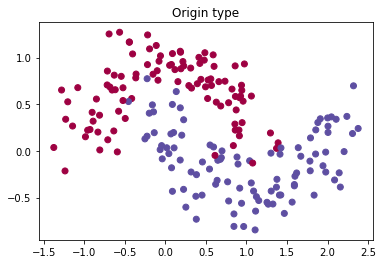

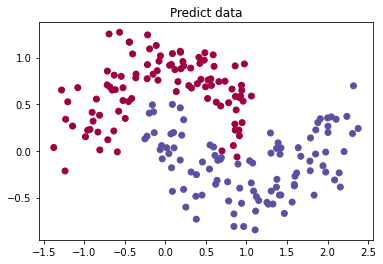

In [7]:
nn.Visulise()

上述是二分类的结果，可以发现模型的精准度与运行速度还是挺好的，整体效果也还是不错。其实当模型训练到300多次的时候，正确度已经很高了，不过因为随机生成数值的原因，所以部分点的分布比较离散，所以精度不能保证达到100%。 

那么，让我们来继续利用此模型处理多分类问题。模型不用改变，只需要将训练以及预测数据集换成'dataset_digits'即可


### (8)导入'dataset_digits'数据集
此处创建了训练、预测的数据集  
其中训练样本为200个，digits.data[100:300]  
预测样本为100个，digits.data[:100]

In [8]:
digits=load_digits()
time1=time.time()
x_train=digits.data[100:300] #生成训练数据集样本,抽取200个样本
y_type=digits.target[100:300] #生成训练数据集类别，为数字0～9
x_predict=digits.data[:100] #生成预测数据集样本
y_predict=digits.target[:100] #生成yuce数据集类别

### (9)训练'dataset_digits'数据集 
此处创建一个新的实例nn2

In [9]:
nn2=NN(datasets=x_train,type=y_type) #创建新的实例
imput_num=(np.shape(x_train)[-1]) #获得输入层的维度，适用于不同的数据集
output_num=0
ls=[]
for i in y_type:
    if i not in ls:
        output_num+=1
        ls.append(i)
nn2.change_Parameters(alpha=0.01,times=1000,input_num=imput_num,hide_num=100,output_num=output_num) #隐层数量可以自定义,此处定义为100层
nn2.init_wb()
nn2.back_calculate()

这是第1次训练,正确率为9.5%
这是第2次训练,正确率为10.0%
这是第3次训练,正确率为10.0%
这是第4次训练,正确率为10.0%
这是第5次训练,正确率为10.0%
这是第6次训练,正确率为10.0%
这是第7次训练,正确率为10.0%
这是第8次训练,正确率为10.0%
这是第9次训练,正确率为10.0%
这是第10次训练,正确率为10.0%
这是第11次训练,正确率为10.0%
这是第12次训练,正确率为17.0%
这是第13次训练,正确率为18.5%
这是第14次训练,正确率为20.5%
这是第15次训练,正确率为20.5%
这是第16次训练,正确率为20.5%
这是第17次训练,正确率为20.5%
这是第18次训练,正确率为20.5%
这是第19次训练,正确率为20.5%
这是第20次训练,正确率为20.5%
这是第21次训练,正确率为20.5%
这是第22次训练,正确率为20.5%
这是第23次训练,正确率为20.5%
这是第24次训练,正确率为20.5%
这是第25次训练,正确率为20.5%
这是第26次训练,正确率为21.5%
这是第27次训练,正确率为20.5%
这是第28次训练,正确率为28.000000000000004%
这是第29次训练,正确率为24.5%
这是第30次训练,正确率为30.0%
这是第31次训练,正确率为30.0%
这是第32次训练,正确率为30.0%
这是第33次训练,正确率为30.0%
这是第34次训练,正确率为30.0%
这是第35次训练,正确率为30.0%
这是第36次训练,正确率为30.0%
这是第37次训练,正确率为30.0%
这是第38次训练,正确率为30.0%
这是第39次训练,正确率为30.0%
这是第40次训练,正确率为30.0%
这是第41次训练,正确率为30.0%
这是第42次训练,正确率为30.0%
这是第43次训练,正确率为30.0%
这是第44次训练,正确率为30.0%
这是第45次训练,正确率为30.0%
这是第46次训练,正确率为30.0%
这是第47次训练,正确率为30.0%
这是第48次训练,正确率为30.0%
这是第49次训练,正确率为30.0%
这是第50次训练,正确率为30.0%
这是第51次训练,正确率为30.0%
这是第52次训练,正确率为30.0%
这是第53次训练

这是第567次训练,正确率为91.5%
这是第568次训练,正确率为91.5%
这是第569次训练,正确率为91.5%
这是第570次训练,正确率为91.5%
这是第571次训练,正确率为91.5%
这是第572次训练,正确率为91.5%
这是第573次训练,正确率为91.5%
这是第574次训练,正确率为91.5%
这是第575次训练,正确率为91.5%
这是第576次训练,正确率为91.5%
这是第577次训练,正确率为91.5%
这是第578次训练,正确率为91.5%
这是第579次训练,正确率为91.5%
这是第580次训练,正确率为91.5%
这是第581次训练,正确率为91.5%
这是第582次训练,正确率为91.5%
这是第583次训练,正确率为91.5%
这是第584次训练,正确率为91.5%
这是第585次训练,正确率为91.5%
这是第586次训练,正确率为91.5%
这是第587次训练,正确率为91.5%
这是第588次训练,正确率为91.5%
这是第589次训练,正确率为91.5%
这是第590次训练,正确率为91.5%
这是第591次训练,正确率为91.5%
这是第592次训练,正确率为91.5%
这是第593次训练,正确率为91.5%
这是第594次训练,正确率为91.5%
这是第595次训练,正确率为91.5%
这是第596次训练,正确率为91.5%
这是第597次训练,正确率为91.5%
这是第598次训练,正确率为91.5%
这是第599次训练,正确率为91.5%
这是第600次训练,正确率为91.5%
这是第601次训练,正确率为91.5%
这是第602次训练,正确率为91.5%
这是第603次训练,正确率为91.5%
这是第604次训练,正确率为91.5%
这是第605次训练,正确率为91.5%
这是第606次训练,正确率为91.5%
这是第607次训练,正确率为91.5%
这是第608次训练,正确率为91.5%
这是第609次训练,正确率为91.5%
这是第610次训练,正确率为91.5%
这是第611次训练,正确率为91.5%
这是第612次训练,正确率为91.5%
这是第613次训练,正确率为91.5%
这是第614次训练,正确率为91.5%
这是第615次训练,正确率为91.5%
这是第616次训练,正确率为91.5%


### (10)预测'dataset_digits'数据集
此处所用的预测数据集为100个样本，且其中样本与训练数据集中样本无重复。

In [10]:
nn2.predict(predict_datasets=x_predict,predict_datasets_type=y_predict)
print(f'本次训练与预测用时{time.time()-time1}秒')

此次预测数据个数为100个,预计预测准确度为100.0%
这是对第1个数据的预测，真实类别为0，预测类别为0
这是对第2个数据的预测，真实类别为1，预测类别为1
这是对第3个数据的预测，真实类别为2，预测类别为2
这是对第4个数据的预测，真实类别为3，预测类别为3
这是对第5个数据的预测，真实类别为4，预测类别为4
这是对第6个数据的预测，真实类别为5，预测类别为9           错
这是对第7个数据的预测，真实类别为6，预测类别为6
这是对第8个数据的预测，真实类别为7，预测类别为7
这是对第9个数据的预测，真实类别为8，预测类别为8
这是对第10个数据的预测，真实类别为9，预测类别为9
这是对第11个数据的预测，真实类别为0，预测类别为0
这是对第12个数据的预测，真实类别为1，预测类别为1
这是对第13个数据的预测，真实类别为2，预测类别为2
这是对第14个数据的预测，真实类别为3，预测类别为3
这是对第15个数据的预测，真实类别为4，预测类别为4
这是对第16个数据的预测，真实类别为5，预测类别为5
这是对第17个数据的预测，真实类别为6，预测类别为6
这是对第18个数据的预测，真实类别为7，预测类别为7
这是对第19个数据的预测，真实类别为8，预测类别为8
这是对第20个数据的预测，真实类别为9，预测类别为9
这是对第21个数据的预测，真实类别为0，预测类别为0
这是对第22个数据的预测，真实类别为1，预测类别为1
这是对第23个数据的预测，真实类别为2，预测类别为2
这是对第24个数据的预测，真实类别为3，预测类别为3
这是对第25个数据的预测，真实类别为4，预测类别为4
这是对第26个数据的预测，真实类别为5，预测类别为5
这是对第27个数据的预测，真实类别为6，预测类别为6
这是对第28个数据的预测，真实类别为7，预测类别为7
这是对第29个数据的预测，真实类别为8，预测类别为8
这是对第30个数据的预测，真实类别为9，预测类别为9
这是对第31个数据的预测，真实类别为0，预测类别为0
这是对第32个数据的预测，真实类别为9，预测类别为9
这是对第33个数据的预测，真实类别为5，预测类别为5
这是对第34个数据的预测，真实类别为5，预测类别为5
这是对第35个数据的预测，真实类别为6，预测类别为6
这是对第36个数据的预测，真实类别为5，预测类

**<big>可见，用这个模型不仅能够预测二分类，而且对于多分类也是得心应手。并且最重要的是，更换不同的数据集合，可以不对模型内部进行修改，只需要导入数据集、创建实例，接下来的工作模型会自己去高效完成！<big>**  
    
接下来我们来调用Softmax模块，看看每一类的概率。

In [11]:
nn2.softmax()

这是第1个数据的Softmax分类结果：
[0.22344459 0.08570457 0.0864193  0.08743853 0.08591819 0.08671275
 0.08594757 0.08580138 0.08577968 0.08683344]
真实类别是0,概率最大的为第1个，代表0

这是第2个数据的Softmax分类结果：
[0.08587194 0.19657002 0.08664755 0.09185692 0.10482277 0.08692295
 0.08745848 0.08594511 0.08789112 0.08601314]
真实类别是1,概率最大的为第2个，代表1

这是第3个数据的Softmax分类结果：
[0.08962843 0.09739167 0.17941782 0.09621581 0.08805988 0.08844535
 0.08971096 0.08885012 0.09420507 0.08807489]
真实类别是2,概率最大的为第3个，代表2

这是第4个数据的Softmax分类结果：
[0.09824058 0.09864976 0.10195571 0.10555746 0.09815873 0.1023353
 0.09854102 0.09851307 0.09915732 0.09889103]
真实类别是3,概率最大的为第4个，代表3

这是第5个数据的Softmax分类结果：
[0.08700986 0.08633187 0.08533229 0.08752947 0.22303495 0.08593996
 0.08754596 0.08652494 0.08543504 0.08531567]
真实类别是4,概率最大的为第5个，代表4

这是第6个数据的Softmax分类结果：
[0.0914711  0.09180955 0.09151436 0.09549043 0.09121026 0.09635489
 0.09128085 0.0912364  0.09744045 0.16219171]
真实类别是5,概率最大的为第10个，代表9(错)

这是第7个数据的Softmax分类结果：
[0.08625306 0.08723506 0.08570677 0.0872

接下来我们调用Sklearn的第三方库，对比我们模型的结果。

In [12]:
digits=load_digits()
time1=time.time()
mlp=MLPClassifier()
mlp_x_train=digits.data[100:300] #生成训练数据集样本,抽取200个样本
mlp_y_train=digits.target[100:300] #生成训练数据集类别，为数字0～9
mlp.fit(mlp_x_train,mlp_y_train) #训练
#print(mlp.n_layers_)
mlp_x_predict=digits.data[:100] #生成预测数据集样本
mlp_y_predict=digits.target[:100] #生成yuce数据集类别
mlp_y_result=mlp.predict(mlp_x_predict) #预测
#print(mlp_y_result)
#print(mlp.score(mlp_x_predict,mlp_y_predict))
#可视化
accuracy=0
for i in range(np.shape(mlp_x_predict)[0]):  # 将预测数据集中的每个数据都进行预测
    if mlp_y_result[i]==mlp_y_predict[i]:
        accuracy+=1
        print(f'这是对第{i+1}个数据的预测，真实类别为{mlp_y_predict[i]}，预测类别为{mlp_y_result[i]}')
    else:
        print(f'这是对第{i+1}个数据的预测，真实类别为{mlp_y_predict[i]}，预测类别为{mlp_y_result[i]}           错')
print(f'此次预测个数为{np.shape(mlp_x_predict)[0]}个，正确率为{(accuracy/np.shape(mlp_x_predict)[0])*100}%')
print(f'本次训练与预测用时{time.time()-time1}秒')

这是对第1个数据的预测，真实类别为0，预测类别为0
这是对第2个数据的预测，真实类别为1，预测类别为1
这是对第3个数据的预测，真实类别为2，预测类别为2
这是对第4个数据的预测，真实类别为3，预测类别为3
这是对第5个数据的预测，真实类别为4，预测类别为4
这是对第6个数据的预测，真实类别为5，预测类别为9           错
这是对第7个数据的预测，真实类别为6，预测类别为6
这是对第8个数据的预测，真实类别为7，预测类别为7
这是对第9个数据的预测，真实类别为8，预测类别为8
这是对第10个数据的预测，真实类别为9，预测类别为9
这是对第11个数据的预测，真实类别为0，预测类别为0
这是对第12个数据的预测，真实类别为1，预测类别为1
这是对第13个数据的预测，真实类别为2，预测类别为2
这是对第14个数据的预测，真实类别为3，预测类别为3
这是对第15个数据的预测，真实类别为4，预测类别为4
这是对第16个数据的预测，真实类别为5，预测类别为5
这是对第17个数据的预测，真实类别为6，预测类别为6
这是对第18个数据的预测，真实类别为7，预测类别为4           错
这是对第19个数据的预测，真实类别为8，预测类别为8
这是对第20个数据的预测，真实类别为9，预测类别为9
这是对第21个数据的预测，真实类别为0，预测类别为0
这是对第22个数据的预测，真实类别为1，预测类别为1
这是对第23个数据的预测，真实类别为2，预测类别为2
这是对第24个数据的预测，真实类别为3，预测类别为3
这是对第25个数据的预测，真实类别为4，预测类别为4
这是对第26个数据的预测，真实类别为5，预测类别为5
这是对第27个数据的预测，真实类别为6，预测类别为6
这是对第28个数据的预测，真实类别为7，预测类别为4           错
这是对第29个数据的预测，真实类别为8，预测类别为8
这是对第30个数据的预测，真实类别为9，预测类别为9
这是对第31个数据的预测，真实类别为0，预测类别为0
这是对第32个数据的预测，真实类别为9，预测类别为9
这是对第33个数据的预测，真实类别为5，预测类别为5
这是对第34个数据的预测，真实类别为5，预测类别为5
这是对第35个数据的预测，真实类别为6，预测类别为6
这是对第36个数据的预测，真实类别为5，预测类别为5
这

可见，还是像上次逻辑回归的对比结果，正确率我们的模型与Sklearn的模型相差不大（我们的偶然还会更高哈哈哈），但是在用时上我们基本上是Sklearn的4-5倍之多，如果把数据集扩大，那时间成本就很高了。不过，因为是直接调用Skleearn的模型，没有将其激活函数，隐层神经元数等参数进行设定，所以如果把我们模型的参数进行优化，说不定也能减少所用时间。另外，因为数据集本来比较小，所以随机生成初始值w,b对模型训练时间影响还是挺大的。

不过可以发现，不管是我们的模型还是Sklearn的模型，对各种数据集的适配性都只是挺好的。

## 总结：
1.经过我的模型与Sklearn模型对比，可以发现正确率我们的模型与Sklearn的模型相差不大，但是在用时上我们基本上是Sklearn的5倍之多。  
2.用这个模型不仅能够预测二分类，而且对于多分类也是得心应手。并且最重要的是，更换不同的数据集合，可以不对模型内部进行修改，只需要导入数据集、创建实例，接下来的工作模型会自己去高效完成！

<big>Debug中解决的问题:</big>  在完成的过程中，Debug时遇见了两个让我卡住许久的地方。  
1.第一个是，当把代码写好后运行，出现了一堆报错，从报错原因来看，主要是因为数组维度的不同而引起的报错，然后我只有从头开始用笔去运算每个数组的维度，从而发现是从哪一步开始维度开始不同，最后发现自己少写了一个运算，导致某个数组的维度与后续的运算不匹配。  
2.第二个是，在把模型运用到多分类问题时，也就是在做第三题时，模型在运行过程中产生了很多Sigmoid函数计算溢出，主要是计算e的次方时数值太大导致的，然后我找了很多解决方法，都只会把问题越搞越复杂，最后可能卡了两三个小时，才发现如果把初始化的b矩阵由用np.empty()随机生成，不如改成用np.zeros()生成，这样可能不会产生溢出，结果一试还真是这样，解决了这个问题也是让我很激动，然后再一看自己的模型预测率也还是很不错的，虽然前前后后花了一天的时间才做好，但是很开心！